In [100]:
import os
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [82]:
env_vars = dotenv_values("../../.env")
os.environ['KAGGLE_USERNAME'] = env_vars.get('KAGGLE_USERNAME', '')
os.environ['KAGGLE_KEY'] = env_vars.get('KAGGLE_KEY', '')
os.environ['KAGGLEHUB_CACHE'] = env_vars.get('KAGGLEHUB_CACHE', '')

print("Variables de entorno de Kaggle cargadas.")

Variables de entorno de Kaggle cargadas.


In [83]:
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: ../../model/data/raw/datasets/datamunge/sign-language-mnist/versions/1


In [84]:
train_file_path= '../data/raw/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_train.csv'
test_file_path='../data/raw/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [ ]:
# ETL
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [86]:
# EDA

X_train = X_train.values / 255.0
X_test = X_test.values / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


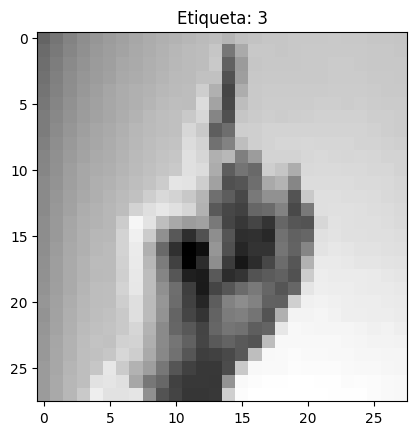

In [87]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.show()

In [ ]:
num_signs = len(np.unique(y_train))

In [89]:
model = keras.Sequential([

    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_signs, activation='softmax')
])

/Users/mako/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# plot_model(
#     model,
#     to_file="nn_model_structure.png",
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_names=True,
#     rankdir="LR"
# )

In [90]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [91]:
EPOCHS= 10
BATCH_SIZE=128

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=True,
)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1278 - loss: 2.8914 - val_accuracy: 0.7762 - val_loss: 0.8923
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6496 - loss: 1.0670 - val_accuracy: 0.9403 - val_loss: 0.2494
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8168 - loss: 0.5388 - val_accuracy: 0.9869 - val_loss: 0.0912
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8918 - loss: 0.3193 - val_accuracy: 0.9951 - val_loss: 0.0373
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9333 - loss: 0.1996 - val_accuracy: 0.9989 - val_loss: 0.0158
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9497 - loss: 0.1545 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9603 - loss: 0.1208 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0912 - val_accu

In [92]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

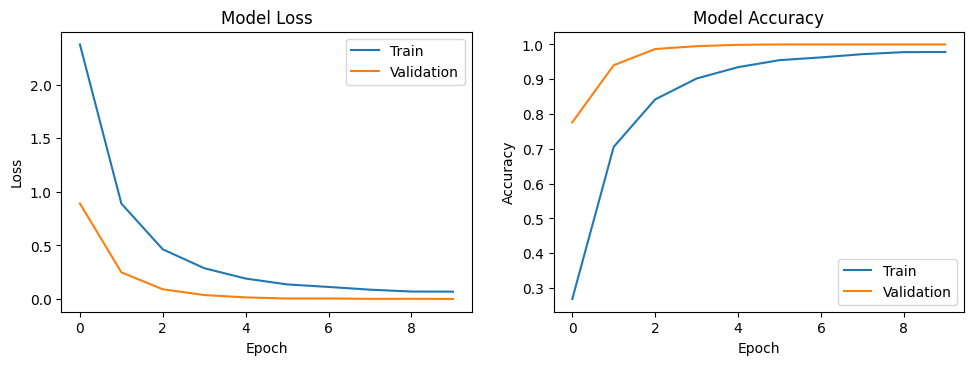

In [96]:
# Train

plt.figure(figsize=(18, 8))

# Loss
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Best Epoch'], loc='upper right')

# Accuracy
plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Best Epoch'], loc='lower right')

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 1800x800 with 0 Axes>

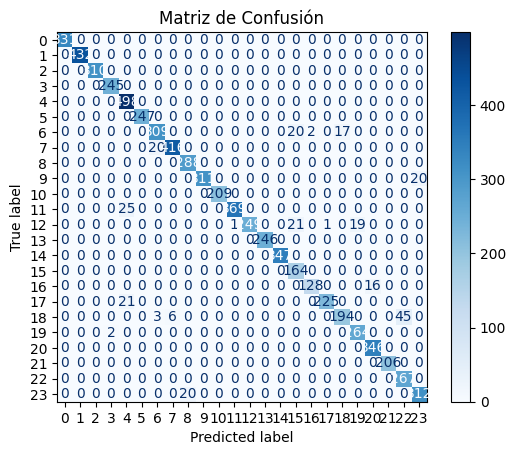

In [103]:
# Evaluate

# confusion matrix

y_pred_probabilities = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
display_labels = np.unique(y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [107]:
save_dir='../saved_models'

model_save_path = os.path.join(save_dir, 'sign-language_minst_model.keras')
model.save(model_save_path)

print(f"modelo guardado en: {model_save_path}")


modelo guardado en: ../saved_models/sign-language_minst_model.keras
